In [2]:
import pandas
import geopandas
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx

In [5]:
data_dir = '.'
origins_file = f'{data_dir}/origins.csv'
destinations_file = f'{data_dir}/destinations.csv'

In [6]:
def csv_data(path, sep=','):
    return pandas.read_csv(path, sep=sep)

origins = csv_data(origins_file)
destinations = csv_data(destinations_file)

In [7]:
origins.head()

,x,y
0,24.6159,59.4052
1,24.6407,59.4074
2,24.6686,59.4018
3,24.6980,59.4477
4,24.7680,59.4303


In [8]:
destinations.head()

,x,y
0,24.8441,59.4395
1,24.6150,59.3433
2,24.8656,59.4405
3,24.6983,59.4013
4,24.7630,59.4407


In [10]:
print(f"origins: {len(origins)}, destinations: {len(destinations)}")

origins: 16, destinations: 20


In [21]:
points = [(data.y, data.x) for index, data in origins.iterrows()]

In [22]:
sample_data = ox.geometries_from_point(points[0], {'name': True})

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


highway                   geometry  bus  \
element_type osmid                                                 
node         11272470        NaN  POINT (24.62730 59.40491)  yes   
             312745352       NaN  POINT (24.60623 59.41271)  yes   
             341986877       NaN  POINT (24.61295 59.40248)  yes   
             344388560  bus_stop  POINT (24.62356 59.40763)  NaN   
             344388563  bus_stop  POINT (24.62830 59.40881)  NaN   

                                 name public_transport admin_level capital  \
element_type osmid                                                           
node         11272470          Jalami    stop_position         NaN     NaN   
             312745352     Harkujärve    stop_position         NaN     NaN   
             341986877       Moonalao    stop_position         NaN     NaN   
             344388560     Järvekalda         platform         NaN     NaN   
             344388563  Järveotsa tee         platform         NaN     NaN   

                       name:am name:ar name:arz  ... old_name:id old_name:li  \
element_type osmid                               ...                           
node         11272470      NaN     NaN      NaN  ...         NaN         NaN   
             312745352     NaN     NaN      NaN  ...         NaN         NaN   
             341986877     NaN     NaN      NaN  ...         NaN         NaN   
             344388560     NaN     NaN      NaN  ...         NaN         NaN   
             344388563     NaN     NaN      NaN  ...         NaN         NaN   

                       old_name:ln old_name:pa old_name:pt old_name:rue  \
element_type osmid                                                        
node         11272470          NaN         NaN         NaN          NaN   
             312745352         NaN         NaN         NaN          NaN   
             341986877         NaN         NaN         NaN          NaN   
             344388560         NaN         NaN         NaN          NaN   
             344388563         NaN         NaN         NaN          NaN   

                       old_name:sco old_name:se old_name:tt old_name:uz  
element_type osmid                                                       
node         11272470           NaN         NaN         NaN         NaN  
             312745352          NaN         NaN         NaN         NaN  
             341986877          NaN         NaN         NaN         NaN  
             344388560          NaN         NaN         NaN         NaN  
             344388563          NaN         NaN         NaN         NaN  

[5 rows x 288 columns]

In [54]:
point = sample_data.iloc[:5]

In [55]:
type(point.crs)

pyproj.crs.crs.CRS

In [25]:
import contextily as ctx

In [40]:
sample_data.reset_index(inplace=True)
sample_data.head()

,level_0,index,highway,geometry,bus,name,public_transport,admin_level,capital,name:am,...,old_name:id,old_name:li,old_name:ln,old_name:pa,old_name:pt,old_name:rue,old_name:sco,old_name:se,old_name:tt,old_name:uz
0,0,0,NaN,POINT (24.62730 59.40491),yes,Jalami,stop_position,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,NaN,POINT (24.60623 59.41271),yes,Harkujärve,stop_position,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,NaN,POINT (24.61295 59.40248),yes,Moonalao,stop_position,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,bus_stop,POINT (24.62356 59.40763),NaN,Järvekalda,platform,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,bus_stop,POINT (24.62830 59.40881),NaN,Järveotsa tee,platform,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
sample_data = sample_data[['geometry', 'name']]
sample_data.head()

,geometry,name
0,POINT (24.62730 59.40491),Jalami
1,POINT (24.60623 59.41271),Harkujärve
2,POINT (24.61295 59.40248),Moonalao
3,POINT (24.62356 59.40763),Järvekalda
4,POINT (24.62830 59.40881),Järveotsa tee


C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:>

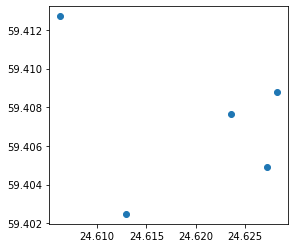

In [56]:
point.plot()

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


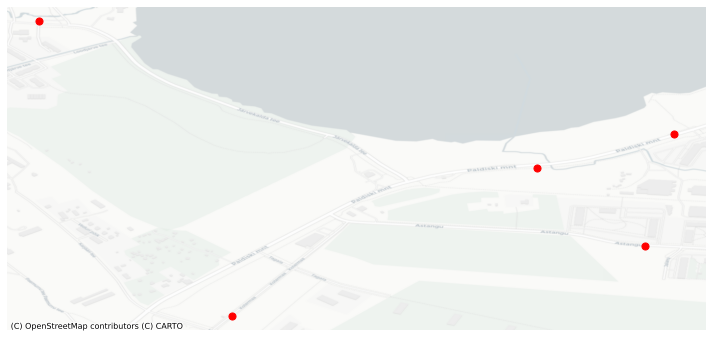

In [57]:
fig, ax = plt.subplots(figsize=(10, 10))
sample_data.reset_index(inplace=True, drop=True)
point.plot(ax=ax, markersize=50, color='red')
ctx.add_basemap(ax=ax, crs=point.crs, source=ctx.providers.CartoDB.Positron)
ax.axis('off')
plt.tight_layout()

In [61]:
[(p[1].x, p[1].y) for p in origins.iterrows()]

[(24.6159, 59.4052),
 (24.6407, 59.4074),
 (24.6686, 59.4018),
 (24.698, 59.4477),
 (24.768, 59.4303),
 (24.7918, 59.4279),
 (24.7536, 59.437),
 (24.8792, 59.4912),
 (24.6882, 59.4074),
 (24.7356, 59.4262),
 (24.8921, 59.4442),
 (24.7157, 59.4275),
 (24.845, 59.4484),
 (24.7563, 59.4377),
 (24.77, 59.4276),
 (24.7508, 59.4383)]

In [67]:
from shapely.geometry import Point

def reverse_geocode(df):
    coords = list(map(lambda x: Point(x[1].x, x[1].y), df.iterrows()))
    return geopandas.tools.reverse_geocode(coords)

In [68]:
origins_geo = reverse_geocode(origins)
destinations_geo = reverse_geocode(destinations)

In [72]:
origins_geo.head()

,geometry,address
0,POINT (24.61569 59.40510),"Astangu Rimi super, 4, Kotermaa, 13524, Koterm..."
1,POINT (24.64080 59.40733),"Grossi Toidukaubad, 35b, Järveotsa tee, 13520,..."
2,POINT (24.66858 59.40177),"41, Ehitajate tee, 12612, Ehitajate tee, Talli..."
3,POINT (24.69788 59.44769),"Grossi, 3, Kari, 10311, Kari, Tallinn, Eesti"
4,POINT (24.76800 59.43026),"Grossi Toidukaubad, 14, Lastekodu, 10113, Last..."


In [73]:
def plotter(*data):
    fig, ax = plt.subplots(figsize=(10, 10))
    sample_data.reset_index(inplace=True, drop=True)
    for point in data:
        point.plot(ax=ax, markersize=50, color='red')
    ctx.add_basemap(ax=ax, crs=point.crs, source=ctx.providers.CartoDB.Positron)
    ax.axis('off')
    plt.tight_layout()

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


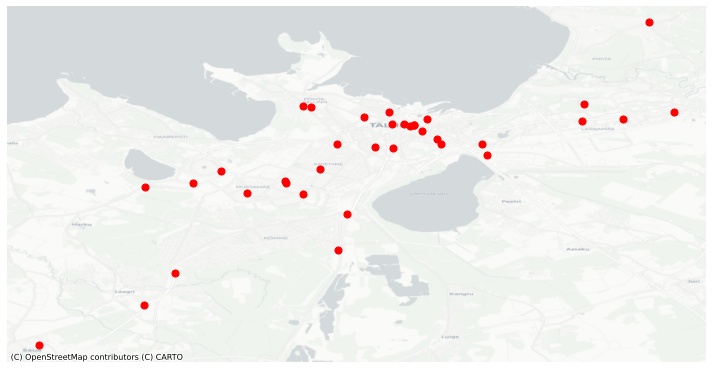

In [74]:
plotter(origins_geo, destinations_geo)

In [90]:
import folium

p = origins_geo.loc[0, 'geometry']
print(p.x, p.y, p.xy[1][0], p.xy[0][0])
origins_geo.merge(destinations_geo).head()

24.615690363597032 59.405099500000006 59.405099500000006 24.615690363597032


,geometry,address
0,POINT (24.75628 59.43769),"Postimaja, 1, Narva mnt, 10111, Narva mnt, Tal..."


In [97]:
def interactive_plotter(*data):
    # get one geometry from data
    point = data[0].loc[0, 'geometry']
    
    # merge the data on top of each other
    dplot = reverse_geocode(pandas.concat([origins, destinations], axis=0, ignore_index=True))
    
    points = [[p.y, p.x] for p in dplot.geometry]
    
    map = folium.Map(location=[point.y, point.x], tiles='OpenStreetMap', zoom_start=12, control_scale=True)
    
    # plot markers on interactive map
    for i, coord in enumerate(points):
        map.add_child(
            folium.Marker(location=coord, popup=str(dplot.address[i]),
                          icon=folium.Icon(color='green', icon='ok-sign'))
        )
        
    return map

In [98]:
interactive_plotter(origins_geo, destinations_geo)